In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
#load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis = 0) # add up sliced data
y = numpy.concatenate((y_train, y_test), axis = 0)
#summarie size
print("Trainning data: ")
print(X.shape)
print(y.shape)

Trainning data: 
(50000,)
(50000,)


In [3]:
imdb.load_data(nb_words=5000)
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [5]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.preprocessing.sequence import TimeseriesGenerator

max_words = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=500, dtype='int32')
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=500, dtype='int32')

In [6]:
from keras.layers import Embedding
Embedding(5000, 32, input_length = 500) # dense representation of work and their meaning

W1011 20:10:40.759871 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [7]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, batch_size=128, nb_epoch=2,
          verbose=1, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size = 128)
print("Accuracy: %.2f%%" % (scores[1]*100))

W1011 20:11:10.332350 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1011 20:11:10.337728 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1011 20:11:10.659158 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1011 20:11:10.698623 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1011 20:11:10.708423 140736157897600 depre

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1011 20:11:11.087663 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 48s 2ms/step - loss: 0.4614 - acc: 0.7563 - val_loss: 0.3009 - val_acc: 0.8698
Epoch 2/2
25000/25000 [==============================] - 5s 182us/step
Accuracy: 87.04%


In [8]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [9]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)



/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [10]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2)) # reduce spatial size, number of parameter, computation time, dimension
model.add(Flatten()) # convert 2D dimension to 1D vector
model.add(Dense(250, activation='relu')) # dense, thick closely connected layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  after removing the cwd from sys.path.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  """
W1012 19:19:08.260360 140736157897600 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [12]:
#fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch=2, batch_size=128, verbose=1) #verbose gets extended information
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 80s 3ms/step - loss: 0.4143 - acc: 0.7917 - val_loss: 0.2724 - val_acc: 0.8849
Epoch 2/2
25000/25000 [==============================] - 77s 3ms/step - loss: 0.2083 - acc: 0.9202 - val_loss: 0.2746 - val_acc: 0.8844
Accuracy: 88.44%


In [15]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
# pad the dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen= max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] ) #optimizer used to minimize error
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch=2, batch_size=128, verbose = 1)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if sys.path[0] == '':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [16]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [17]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
#create model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words)) # embedd words
model.add(Flatten())   # convert 2D into 1D vectors
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # 1 class
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4516 - acc: 0.7654 - val_loss: 0.2862 - val_acc: 0.8798
Epoch 2/2
25000/25000 [==============================] - 48s 2ms/step - loss: 0.1679 - acc: 0.9363 - val_loss: 0.3123 - val_acc: 0.8740
ACC: 87.40%


In [18]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
#pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same',activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128,verbose=1)
#final evaluation of the mode
scores=model.evaluate(X_test,y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if sys.path[0] == '':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [10]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train/255.0
X_test = X_test/255.0
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#create the model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(3, 32, 32), border_mode='same',activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode = 'same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
#compile mode
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = epochs, batch_size=32, verbose=2)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))




In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size = 128, verbose=1)
#final evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if sys.path[0] == '':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1014 18:07:15.363343 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 75s 3ms/step - loss: 0.4882 - acc: 0.7293 - val_loss: 0.2762 - val_acc: 0.8847
Epoch 2/2
25000/25000 [==============================] - 70s 3ms/step - loss: 0.2160 - acc: 0.9150 - val_loss: 0.2754 - val_acc: 0.8840
ACC: 88.40%


In [6]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size = 128, verbose=1)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4566 - acc: 0.7597 - val_loss: 0.3500 - val_acc: 0.8466
Epoch 2/2
25000/25000 [==============================] - 44s 2ms/step - loss: 0.1599 - acc: 0.9408 - val_loss: 0.3216 - val_acc: 0.8706
ACC: 87.06%


In [ ]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data
#normalize inputs from 0-255 to -0.0-1.0
X_train = X_train/255.0
X_test = X_test/255.0
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#create the model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(3,32,32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2d(32,3,3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(Maxpooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
epochs=25
lrate=0.01
decay=lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32, verbose=2)
#final evaluation of the model
model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))





In [ ]:
#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize data
X_train = X_train/255.0
X_test = X_test/255.0
#one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
#create model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(3,32,32), border_mode='same', activation = 'relu', W_constraint = maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32,3,3, activation = 'relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
epochs=25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train,y_train, validation_data=(X_test,y_test), nb_epochs=epochs, batch_size=32, verbose=2)
#final evaluation of the model
model.evaluate(X_test,y_test,verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


In [1]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
top_words=5000
(X_train,y_train), (X_test,y_test)= imdb.load_data(nb_words=top_words)
max_words=500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128,verbose=1)
#Final evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))



W1015 17:51:07.311192 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1015 17:51:07.339560 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1015 17:51:07.353943 140736193037184 deprecation.py:323] From /Users/syem/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from i

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1015 17:51:07.699267 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 49s 2ms/step - loss: 0.4452 - acc: 0.7738 - val_loss: 0.2908 - val_acc: 0.8777
Epoch 2/2
25000/25000 [==============================] - 43s 2ms/step - loss: 0.1674 - acc: 0.9380 - val_loss: 0.3270 - val_acc: 0.8682
ACC: 86.82%


In [ ]:
top_words = 5000
(X_train, y_train), (X_test,y_test) = imdb.load_data(nb_words=top_words)
max_words=500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filters=32, filter_length=3, border_mode='same', activation = 'relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activaion='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit
model.fit(X_train,y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128,verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))


In [4]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [5]:
# load data, keep top n words, zero the rest
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad the dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128, verbose=1)
#Final Evaluation of the model
scores= model.evaluate(X_test, y_test, verbose=0);
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if sys.path[0] == '':
W1016 15:40:04.129194 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarnin

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [7]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
# final evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 59s 2ms/step - loss: 0.4888 - acc: 0.7364 - val_loss: 0.2964 - val_acc: 0.8740
Epoch 2/2
25000/25000 [==============================] - 45s 2ms/step - loss: 0.1839 - acc: 0.9309 - val_loss: 0.3130 - val_acc: 0.8713
ACC: 87.13%


In [1]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#rshape to [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
#configure the batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


Using TensorFlow backend.
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


<Figure size 640x480 with 9 Axes>

In [2]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

In [ ]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')
#normalize from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
    model = Sequential()
    model.add(Convolution2D(32,5,5, input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 10, batch_size=200, verbose=2)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))


W1017 16:44:31.100553 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(1, 28, 28..., activation="relu")`
  app.launch_new_instance()
W1017 16:44:31.471197 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 16:44:31.538336 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1017 16:44:31.624821

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


In [2]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

Using TensorFlow backend.


In [ ]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#normalize input from 0-255 to -0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# create model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(3,32,32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32,3,3, activation = 'relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# compile model
epochs = 25
lrate = 0.01 # learning rate adapts to errors, weight determines connections between neurons, how much impact does the input have on the output
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum = 0.9, decay = decay, nesterov= False) # momentum speeds up optimization methods
model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=epochs, batch_size=32, verbose=2)
#model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%% " % (scores[1]*100))





W1017 17:08:17.538779 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 32, 32..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  
W1017 17:08:17.574483 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 17:08:17.582513 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

W1017 17:08:18.511605 140736193037184 deprecation.py:323] From /Users/syem/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25


In [1]:
import pandas
import matplotlib.pyplot as plt

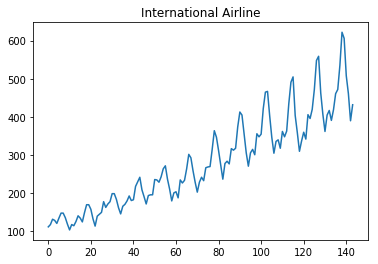

In [5]:
dataset = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.title('International Airline')
plt.show()



In [6]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
df = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter=3)
dataset = df.values
dataset = dataset.astype('float32')
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))




96 48


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i : (i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [15]:
#reshape into X=t, y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [16]:
# create and fit multilayer perceptron model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch = 200, batch_size = 2, verbose=2)


W1018 17:38:17.540700 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 17:38:17.605221 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 17:38:17.622206 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1018 17:38:17.682522 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/Users/syem/

Epoch 1/200
 - 1s - loss: 95457.3861
Epoch 2/200
 - 0s - loss: 77977.7466
Epoch 3/200
 - 0s - loss: 62787.5859
Epoch 4/200
 - 0s - loss: 49715.4246
Epoch 5/200
 - 0s - loss: 38394.6346
Epoch 6/200
 - 0s - loss: 28628.1393
Epoch 7/200
 - 0s - loss: 20844.6452
Epoch 8/200
 - 0s - loss: 14416.7644
Epoch 9/200
 - 0s - loss: 9661.0801
Epoch 10/200
 - 0s - loss: 6167.8495
Epoch 11/200
 - 0s - loss: 3822.4540
Epoch 12/200
 - 0s - loss: 2341.4599
Epoch 13/200
 - 0s - loss: 1471.7076
Epoch 14/200
 - 0s - loss: 989.7394
Epoch 15/200
 - 0s - loss: 753.8985
Epoch 16/200
 - 0s - loss: 631.9887
Epoch 17/200
 - 0s - loss: 575.3429
Epoch 18/200
 - 0s - loss: 550.7009
Epoch 19/200
 - 0s - loss: 541.8172
Epoch 20/200
 - 0s - loss: 538.0314
Epoch 21/200
 - 0s - loss: 537.7740
Epoch 22/200
 - 0s - loss: 535.4151
Epoch 23/200
 - 0s - loss: 535.2020
Epoch 24/200
 - 0s - loss: 536.8918
Epoch 25/200
 - 0s - loss: 535.0367
Epoch 26/200
 - 0s - loss: 534.6260
Epoch 27/200
 - 0s - loss: 535.8559
Epoch 28/200
 - 

In [17]:
#estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 530.86 MSE (23.04 RMSE)
Test Score: 2352.33 MSE (48.50 RMSE)


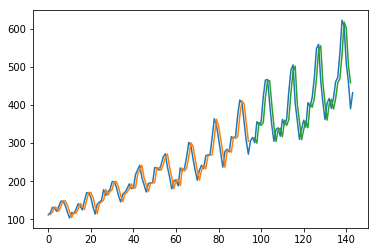

In [18]:
#generate predictions for trainning
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :]  = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2) + 1:len(dataset)-1, :] = testPredict
#plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [20]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY  = [], []
    for i in range(len(dataset) -look_back - 1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

df = pandas.read_csv("Downloads/international_airline.csv", usecols=[1], engine='python', skipfooter=3)
dataset = df.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
#fit into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t, y=t+1
look_back = 1
train_X, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
#make predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean square error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (testScore))
# shift tests predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, : ] = trainPredict
#shift test predictions for plotting
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plt(TestPredictPlot)
plt.show()




/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
W1019 17:05:49.596687 140736193037184 deprecation.py:323] From /Users/syem/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 5s - loss: 0.0378
Epoch 2/100
 - 1s - loss: 0.0324
Epoch 3/100
 - 1s - loss: 0.0274
Epoch 4/100
 - 1s - loss: 0.0230
Epoch 5/100
 - 1s - loss: 0.0192
Epoch 6/100
 - 1s - loss: 0.0170
Epoch 7/100
 - 1s - loss: 0.0138
Epoch 8/100
 - 1s - loss: 0.0118
Epoch 9/100
 - 1s - loss: 0.0113
Epoch 10/100
 - 1s - loss: 0.0098
Epoch 11/100
 - 1s - loss: 0.0086
Epoch 12/100
 - 1s - loss: 0.0075
Epoch 13/100
 - 1s - loss: 0.0072
Epoch 14/100
 - 1s - loss: 0.0068
Epoch 15/100
 - 1s - loss: 0.0069
Epoch 16/100
 - 1s - loss: 0.0069
Epoch 17/100
 - 1s - loss: 0.0068
Epoch 18/100
 - 1s - loss: 0.0070
Epoch 19/100
 - 1s - loss: 0.0064
Epoch 20/100
 - 1s - loss: 0.0067
Epoch 21/100
 - 1s - loss: 0.0062
Epoch 22/100
 - 1s - loss: 0.0061
Epoch 23/100
 - 1s - loss: 0.0062
Epoch 24/100
 - 1s - loss: 0.0066
Epoch 25/100
 - 1s - loss: 0.0065
Epoch 26/100
 - 1s - loss: 0.0058
Epoch 27/100
 - 1s - loss: 0.0060
Epoch 28/100
 - 1s - loss: 0.0057
Epoch 29/100
 - 1s - loss: 0.0065
Epoch 30/100
 - 1s - lo

TypeError: Singleton array 0.027027026 cannot be considered a valid collection.

In [21]:
# Load and Plot the IMDB dataset
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

In [2]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


Using TensorFlow backend.


In [3]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words)) # has weights which are learned, understand the pattern
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
# fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1020 15:54:16.245902 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1020 15:54:16.291192 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1020 15:54:16.307035 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1020 15:54:16.415313 140736193037

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1020 15:54:16.795958 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 58s 2ms/step - loss: 0.4781 - acc: 0.7386 - val_loss: 0.2885 - val_acc: 0.8786
Epoch 2/2
25000/25000 [==============================] - 49s 2ms/step - loss: 0.1753 - acc: 0.9349 - val_loss: 0.3091 - val_acc: 0.8705
ACC: 87.05%


In [5]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [6]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128, verbose=1)
# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if __name__ == '__main__':
W1020 16:04:10.671850 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 71s 3ms/step - loss: 0.4399 - acc: 0.7691 - val_loss: 0.2879 - val_acc: 0.8787
Epoch 2/2
25000/25000 [==============================] - 68s 3ms/step - loss: 0.2158 - acc: 0.9161 - val_loss: 0.2768 - val_acc: 0.8847
ACC: 88.47%


In [7]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [9]:
top_words = 5000
(X_train,y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation="relu"))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train,y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%%" %(scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [10]:
# Large CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.tensorflow_backend.set_image_dim_ordering('th')

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# create the model
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=(3,32,32), activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32,3,3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,3,3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(64,3,3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,3,3, activation = 'relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128,3,3, activation='relu', border_mode='same'))
model.add(Maxpooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu', W_constraint = maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum = 0.9, decay = decay, nesterov=Flase)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
print(model.summary())
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = epochs, batch_size= 64)
#final evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1] * 100))


In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [5]:
top_words = 5000
(X_train, y_train), (X_test,y_test) = imdb.load_data(nb_words=top_words)

max_words = 500
X_train = sequence.pad_sequences(X_train,maxlen= max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size = 128, verbose=1)
#Final evaluation of the model
scores= model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%% " % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # This is added back by InteractiveShellApp.init_path()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1021 15:25:30.499160 140736193037184 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 75s 3ms/step - loss: 0.4268 - acc: 0.7785 - val_loss: 0.2665 - val_acc: 0.8888
Epoch 2/2
25000/25000 [==============================] - 70s 3ms/step - loss: 0.2056 - acc: 0.9202 - val_loss: 0.2896 - val_acc: 0.8828
ACC: 88.28% 


In [6]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [7]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), nb_epoch=2, batch_size=128, verbose=1)
#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 61s 2ms/step - loss: 0.5040 - acc: 0.7173 - val_loss: 0.2985 - val_acc: 0.8738
Epoch 2/2
25000/25000 [==============================] - 50s 2ms/step - loss: 0.1827 - acc: 0.9321 - val_loss: 0.3117 - val_acc: 0.8698
ACC: 86.98%


In [8]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same',activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))




/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [1]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#reshape to [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip = True)
# fit parameter from data
datagen.fit(X_train)
#
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break





Using TensorFlow backend.
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


<Figure size 640x480 with 9 Axes>

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY  = [], []
    for i in range(len(dataset) -look_back - 1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

df = pandas.read_csv("Downloads/international_airline.csv", usecols=[1], engine='python', skipfooter=3)


In [ ]:
dataset = df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 1

train_X, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
train_X = numpy.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, trainY, nb_epoch=100, batch_size=1, verbose=2)
trainPredict = model.predict(train_X)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (testScore))
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back: len(trainPredict) + look_back, : ] = trainPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plt(TestPredictPlot)
plt.show()




/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  app.launch_new_instance()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  app.launch_new_instance()
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
 - 4s - loss: 0.0527
Epoch 2/100
 - 1s - loss: 0.0249
Epoch 3/100
 - 1s - loss: 0.0185
Epoch 4/100
 - 1s - loss: 0.0170
Epoch 5/100
 - 1s - loss: 0.0158
Epoch 6/100
 - 1s - loss: 0.0148
Epoch 7/100
 - 1s - loss: 0.0137
Epoch 8/100
 - 1s - loss: 0.0125
Epoch 9/100
 - 1s - loss: 0.0115
Epoch 10/100
 - 1s - loss: 0.0103
Epoch 11/100
 - 1s - loss: 0.0093
Epoch 12/100
 - 1s - loss: 0.0083
Epoch 13/100
 - 1s - loss: 0.0074
Epoch 14/100
 - 1s - loss: 0.0064
Epoch 15/100
 - 1s - loss: 0.0056
Epoch 16/100
 - 1s - loss: 0.0049
Epoch 17/100
 - 1s - loss: 0.0042
Epoch 18/100
 - 1s - loss: 0.0037
Epoch 19/100
 - 1s - loss: 0.0032
Epoch 20/100
 - 1s - loss: 0.0029
Epoch 21/100
 - 1s - loss: 0.0026
Epoch 22/100
 - 1s - loss: 0.0024
Epoch 23/100
 - 1s - loss: 0.0024
Epoch 24/100
 - 1s - loss: 0.0022
Epoch 25/100
 - 1s - loss: 0.0022
Epoch 26/100
 - 1s - loss: 0.0021
Epoch 27/100
 - 1s - loss: 0.0021
Epoch 28/100
 - 1s - loss: 0.0021
Epoch 29/100
 - 1s - loss: 0.0021
Epoch 30/100
 - 1s - lo

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')



In [3]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [7]:
# reshape into X=t, y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [8]:
# create and fit Multilayer Perception model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


W1108 15:59:33.894024 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 15:59:34.069833 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 15:59:34.133280 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1108 15:59:34.260778 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/Users/syem/

Epoch 1/200
 - 2s - loss: 65014.1373
Epoch 2/200
 - 0s - loss: 55237.2849
Epoch 3/200
 - 0s - loss: 47261.7575
Epoch 4/200
 - 0s - loss: 40525.7497
Epoch 5/200
 - 0s - loss: 34504.8033
Epoch 6/200
 - 0s - loss: 29153.4072
Epoch 7/200
 - 0s - loss: 24110.8005
Epoch 8/200
 - 0s - loss: 19612.5048
Epoch 9/200
 - 0s - loss: 15654.3262
Epoch 10/200
 - 0s - loss: 12038.9680
Epoch 11/200
 - 0s - loss: 8779.6559
Epoch 12/200
 - 0s - loss: 6113.1151
Epoch 13/200
 - 0s - loss: 4013.5385
Epoch 14/200
 - 0s - loss: 2573.1122
Epoch 15/200
 - 0s - loss: 1615.5925
Epoch 16/200
 - 0s - loss: 1063.5024
Epoch 17/200
 - 0s - loss: 774.4929
Epoch 18/200
 - 0s - loss: 633.7259
Epoch 19/200
 - 0s - loss: 573.6858
Epoch 20/200
 - 0s - loss: 551.6680
Epoch 21/200
 - 0s - loss: 543.5496
Epoch 22/200
 - 0s - loss: 538.2408
Epoch 23/200
 - 0s - loss: 537.7712
Epoch 24/200
 - 0s - loss: 538.3150
Epoch 25/200
 - 0s - loss: 543.7431
Epoch 26/200
 - 0s - loss: 539.4993
Epoch 27/200
 - 0s - loss: 536.2180
Epoch 28/20

In [9]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 531.04 MSE (23.04 RMSE)
Test Score: 2352.41 MSE (48.50 RMSE)


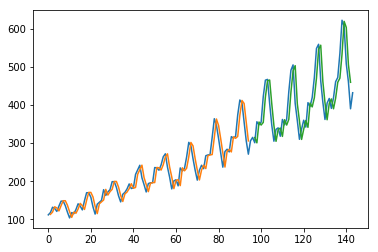

In [10]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [11]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

In [12]:
dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols = [1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a) 
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshaoe into X= t, y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [16]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/200
 - 2s - loss: 153992.3551
Epoch 2/200
 - 0s - loss: 134842.7209
Epoch 3/200
 - 0s - loss: 119729.0993
Epoch 4/200
 - 0s - loss: 107220.8925
Epoch 5/200
 - 0s - loss: 97186.1961
Epoch 6/200
 - 0s - loss: 88692.3055
Epoch 7/200
 - 0s - loss: 81348.8587
Epoch 8/200
 - 0s - loss: 74777.5784
Epoch 9/200
 - 0s - loss: 68660.1493
Epoch 10/200
 - 0s - loss: 62684.0968
Epoch 11/200
 - 0s - loss: 56677.7080
Epoch 12/200
 - 0s - loss: 50303.8968
Epoch 13/200
 - 0s - loss: 43750.8750
Epoch 14/200
 - 0s - loss: 37018.4907
Epoch 15/200
 - 0s - loss: 30418.5980
Epoch 16/200
 - 0s - loss: 23977.8851
Epoch 17/200
 - 0s - loss: 18256.2711
Epoch 18/200
 - 0s - loss: 13293.1662
Epoch 19/200
 - 0s - loss: 9240.3204
Epoch 20/200
 - 0s - loss: 6200.1804
Epoch 21/200
 - 0s - loss: 4011.7766
Epoch 22/200
 - 0s - loss: 2555.0222
Epoch 23/200
 - 0s - loss: 1664.8091
Epoch 24/200
 - 0s - loss: 1111.7681
Epoch 25/200
 - 0s - loss: 830.0441
Epoch 26/200
 - 0s - loss: 672.2605
Epoch 27/200
 - 0s - loss: 

In [19]:
# estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 532.55 MSE (23.08 RMSE)
Test Score: 2358.09 MSE (48.56 RMSE)


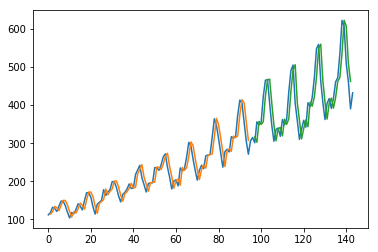

In [21]:
# generate predictions for trainning
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# sfit test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(dataset)-1, : ] = testPredict
#plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


In [3]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape the dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch = 200, batch_size=2, verbose=2)
# Estimate the model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))



W1110 15:56:40.450339 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 15:56:40.490394 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 15:56:40.494129 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 15:56:40.528574 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



96 48


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app
W1110 15:56:40.743293 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1110 15:56:40.876992 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
 - 1s - loss: 25197.8580
Epoch 2/200
 - 0s - loss: 6148.4061
Epoch 3/200
 - 0s - loss: 5299.3854
Epoch 4/200
 - 0s - loss: 5275.9215
Epoch 5/200
 - 0s - loss: 5119.7891
Epoch 6/200
 - 0s - loss: 5004.3150
Epoch 7/200
 - 0s - loss: 5027.8569
Epoch 8/200
 - 0s - loss: 4751.5650
Epoch 9/200
 - 0s - loss: 4579.4671
Epoch 10/200
 - 0s - loss: 4499.1238
Epoch 11/200
 - 0s - loss: 4393.3933
Epoch 12/200
 - 0s - loss: 4217.9234
Epoch 13/200
 - 0s - loss: 4125.9642
Epoch 14/200
 - 0s - loss: 3989.5782
Epoch 15/200
 - 0s - loss: 3892.2335
Epoch 16/200
 - 0s - loss: 3775.2427
Epoch 17/200
 - 0s - loss: 3718.6004
Epoch 18/200
 - 0s - loss: 3656.8146
Epoch 19/200
 - 0s - loss: 3502.6592
Epoch 20/200
 - 0s - loss: 3453.4738
Epoch 21/200
 - 0s - loss: 3364.0727
Epoch 22/200
 - 0s - loss: 3213.3903
Epoch 23/200
 - 0s - loss: 3108.0464
Epoch 24/200
 - 0s - loss: 3064.9117
Epoch 25/200
 - 0s - loss: 2946.1881
Epoch 26/200
 - 0s - loss: 2919.2302
Epoch 27/200
 - 0s - loss: 2852.6527
Epoch 28/

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 5000
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Acc: %.2f%%' % (scores[1]*100))



W1111 15:33:32.391479 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 15:33:32.496683 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 15:33:32.523199 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-pa

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 32)          160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5000, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               20000250  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 20,163,605
Trainable params: 20,163,605
Non-trainable params: 0
__________________________________________

W1111 15:33:33.081034 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 11007s 440ms/step - loss: 0.5104 - acc: 0.7265 - val_loss: 0.2879 - val_acc: 0.8797
Epoch 2/2
25000/25000 [==============================] - 3926s 157ms/step - loss: 0.2301 - acc: 0.9100 - val_loss: 0.2685 - val_acc: 0.8898
Acc: 88.98%


In [1]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


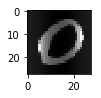

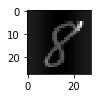

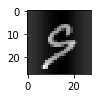

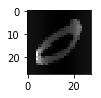

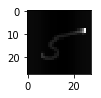

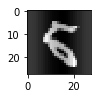

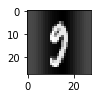

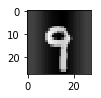

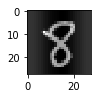

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
# convert int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data prep
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit the parameters from data
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
        pyplot.show()
    break


In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# load the dataset
dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols=[1],
engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


In [5]:
# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


W1112 17:05:52.803727 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1112 17:05:52.941014 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1112 17:05:53.080852 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W1112 17:05:53.327450 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-package

Epoch 1/200
 - 1s - loss: 40261.5982
Epoch 2/200
 - 0s - loss: 29199.1779
Epoch 3/200
 - 0s - loss: 19843.5645
Epoch 4/200
 - 0s - loss: 12494.5265
Epoch 5/200
 - 0s - loss: 7231.4778
Epoch 6/200
 - 0s - loss: 3814.5638
Epoch 7/200
 - 0s - loss: 1955.4989
Epoch 8/200
 - 0s - loss: 1054.5399
Epoch 9/200
 - 0s - loss: 710.2781
Epoch 10/200
 - 0s - loss: 582.2852
Epoch 11/200
 - 0s - loss: 551.6837
Epoch 12/200
 - 0s - loss: 541.1914
Epoch 13/200
 - 0s - loss: 539.2583
Epoch 14/200
 - 0s - loss: 537.2008
Epoch 15/200
 - 0s - loss: 536.4969
Epoch 16/200
 - 0s - loss: 537.7232
Epoch 17/200
 - 0s - loss: 535.7718
Epoch 18/200
 - 0s - loss: 544.6122
Epoch 19/200
 - 0s - loss: 538.2507
Epoch 20/200
 - 0s - loss: 537.2715
Epoch 21/200
 - 0s - loss: 540.8818
Epoch 22/200
 - 0s - loss: 539.3345
Epoch 23/200
 - 0s - loss: 537.5240
Epoch 24/200
 - 0s - loss: 536.6961
Epoch 25/200
 - 0s - loss: 540.9677
Epoch 26/200
 - 0s - loss: 536.8565
Epoch 27/200
 - 0s - loss: 539.6488
Epoch 28/200
 - 0s - loss

In [13]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE(%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)'% (testScore, math.sqrt(testScore)))


Train Score: 529.63 MSE(23.01 RMSE)
Test Score: 2348.44 MSE (48.46 RMSE)


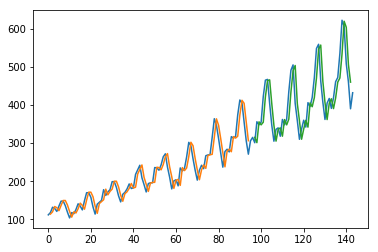

In [14]:

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# test shift predictions
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

# plot
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [15]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matri

In [19]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [20]:
# load the dataset
dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)


In [21]:
# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape into X=t, y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W1113 17:10:00.163410 140735902135168 deprecation.py:323] From /Users/syem/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.wher

Epoch 1/100
 - 6s - loss: 0.0473
Epoch 2/100
 - 1s - loss: 0.0222
Epoch 3/100
 - 1s - loss: 0.0173
Epoch 4/100
 - 1s - loss: 0.0161
Epoch 5/100
 - 1s - loss: 0.0148
Epoch 6/100
 - 1s - loss: 0.0137
Epoch 7/100
 - 1s - loss: 0.0127
Epoch 8/100
 - 1s - loss: 0.0115
Epoch 9/100
 - 1s - loss: 0.0106
Epoch 10/100
 - 1s - loss: 0.0096
Epoch 11/100
 - 1s - loss: 0.0087
Epoch 12/100
 - 1s - loss: 0.0078
Epoch 13/100
 - 1s - loss: 0.0070
Epoch 14/100
 - 1s - loss: 0.0062
Epoch 15/100
 - 1s - loss: 0.0055
Epoch 16/100
 - 1s - loss: 0.0048
Epoch 17/100
 - 1s - loss: 0.0043
Epoch 18/100
 - 1s - loss: 0.0038
Epoch 19/100
 - 1s - loss: 0.0033
Epoch 20/100
 - 1s - loss: 0.0030
Epoch 21/100
 - 1s - loss: 0.0027
Epoch 22/100
 - 1s - loss: 0.0026
Epoch 23/100
 - 1s - loss: 0.0025
Epoch 24/100
 - 1s - loss: 0.0023
Epoch 25/100
 - 1s - loss: 0.0022
Epoch 26/100
 - 1s - loss: 0.0021
Epoch 27/100
 - 1s - loss: 0.0021
Epoch 28/100
 - 1s - loss: 0.0021
Epoch 29/100
 - 1s - loss: 0.0020
Epoch 30/100
 - 1s - lo

In [1]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



NameError: name 'math' is not defined

In [2]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1115 15:18:08.202795 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1115 15:18:08.349722 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1115 15:18:08.382040 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1115 15:18:08.494215 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1115 15:18:08.909172 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 50s 2ms/step - loss: 0.4552 - acc: 0.7656 - val_loss: 0.3112 - val_acc: 0.8662
Epoch 2/2
25000/25000 [==============================] - 47s 2ms/step - loss: 0.1707 - acc: 0.9372 - val_loss: 0.3131 - val_acc: 0.8735
ACC: 87.35%


In [4]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [5]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if __name__ == '__main__':
W1115 15:28:11.903633 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [1]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


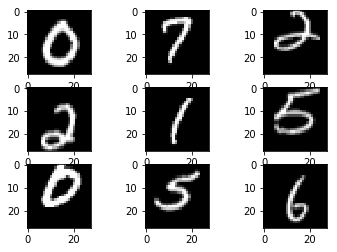

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range = shift)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break



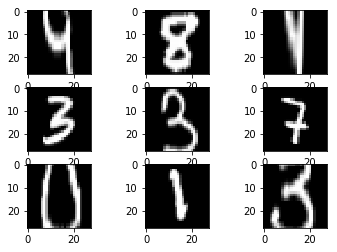

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap = pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i  in range(len(dataset)- look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



In [3]:
dataframe = pandas.read_csv('Downloads/international_airline.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')


In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0: train_size, : ], dataset[train_size:len(dataset), :]
print(len(train), len(test))

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


96 48


In [5]:
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


W1116 16:45:27.717541 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1116 16:45:27.813618 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1116 16:45:27.819833 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1116 16:45:27.873337 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/Users/syem/

Epoch 1/200
 - 2s - loss: 3315.1528
Epoch 2/200
 - 0s - loss: 1879.0844
Epoch 3/200
 - 0s - loss: 1453.7146
Epoch 4/200
 - 0s - loss: 1281.1249
Epoch 5/200
 - 0s - loss: 1249.9112
Epoch 6/200
 - 0s - loss: 1221.4323
Epoch 7/200
 - 0s - loss: 1156.9193
Epoch 8/200
 - 0s - loss: 1201.5468
Epoch 9/200
 - 0s - loss: 1113.4180
Epoch 10/200
 - 0s - loss: 1015.1666
Epoch 11/200
 - 0s - loss: 990.2016
Epoch 12/200
 - 0s - loss: 969.2922
Epoch 13/200
 - 0s - loss: 907.0830
Epoch 14/200
 - 0s - loss: 936.6245
Epoch 15/200
 - 0s - loss: 852.0748
Epoch 16/200
 - 0s - loss: 871.8822
Epoch 17/200
 - 0s - loss: 811.7629
Epoch 18/200
 - 0s - loss: 826.1095
Epoch 19/200
 - 0s - loss: 788.2915
Epoch 20/200
 - 0s - loss: 753.6637
Epoch 21/200
 - 0s - loss: 721.6898
Epoch 22/200
 - 0s - loss: 691.7842
Epoch 23/200
 - 0s - loss: 766.6132
Epoch 24/200
 - 0s - loss: 680.5006
Epoch 25/200
 - 0s - loss: 705.7302
Epoch 26/200
 - 0s - loss: 703.9904
Epoch 27/200
 - 0s - loss: 598.9858
Epoch 28/200
 - 0s - loss: 

In [6]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Train Score: 331.82 MSE (18.22 RMSE)
Test Score: 1398.85 MSE (37.40 RMSE)


In [ ]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+ 1:len(dataset)-1, :] = testPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train), (X_test,y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1117 15:24:59.286227 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 15:24:59.453991 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 15:24:59.497336 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1117 15:25:00.156815 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 85s 3ms/step - loss: 0.5203 - acc: 0.7057 - val_loss: 0.3296 - val_acc: 0.8607
Epoch 2/2
25000/25000 [==============================] - 77s 3ms/step - loss: 0.2322 - acc: 0.9076 - val_loss: 0.2740 - val_acc: 0.8857
ACC: 88.57%


In [3]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [4]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4867 - acc: 0.7400 - val_loss: 0.2971 - val_acc: 0.8736
Epoch 2/2
25000/25000 [==============================] - 49s 2ms/step - loss: 0.1844 - acc: 0.9281 - val_loss: 0.3002 - val_acc: 0.8754
ACC: 87.54%


In [5]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K

In [1]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


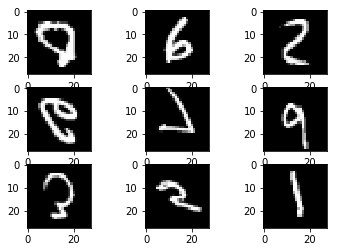

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [3]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

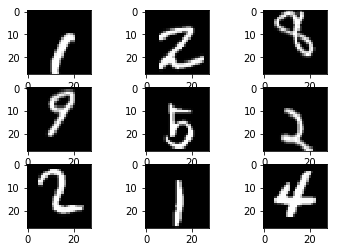

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
shift = 0.2
datagen = ImageDataGenerator(width_shift_range = shift, height_shift_range=shift)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [5]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

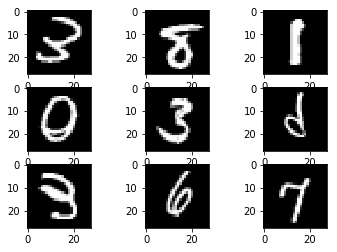

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [7]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose= 1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


W1118 13:51:59.750838 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1118 13:52:00.358085 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1118 13:52:00.406636 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1118 13:52:00.571735 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1118 13:52:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1118 13:52:01.054202 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2


In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [3]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1118 14:00:45.709478 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1118 14:00:45.877047 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1118 14:00:45.902708 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1118 14:00:46.488970 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 77s 3ms/step - loss: 0.5046 - acc: 0.7075 - val_loss: 0.2896 - val_acc: 0.8784
Epoch 2/2
25000/25000 [==============================] - 74s 3ms/step - loss: 0.2342 - acc: 0.9084 - val_loss: 0.2708 - val_acc: 0.8873
ACC: 88.73%


In [1]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
 

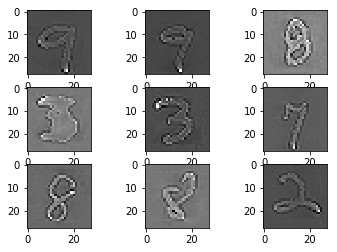

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [3]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1119 16:00:48.761201 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 16:00:49.286370 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 16:00:49.335448 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 16:00:49.499109 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1119 16:00:49.953705 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2


In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1119 16:19:55.216555 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 16:19:55.269391 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 16:19:55.275053 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1119 16:19:55.771042 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 72s 3ms/step - loss: 0.4321 - acc: 0.7797 - val_loss: 0.2753 - val_acc: 0.8846
Epoch 2/2
25000/25000 [==============================] - 70s 3ms/step - loss: 0.2063 - acc: 0.9194 - val_loss: 0.2709 - val_acc: 0.8866
ACC: 88.66%


In [1]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


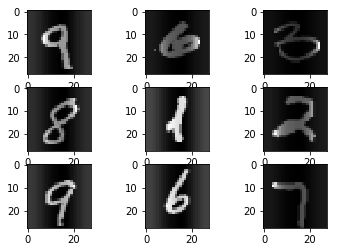

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    break
    


In [1]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1120 16:36:29.449876 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1120 16:36:29.487514 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1120 16:36:29.490071 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1120 16:36:29.540251 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1120 16:36:29.993067 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 46s 2ms/step - loss: 0.4548 - acc: 0.7636 - val_loss: 0.2903 - val_acc: 0.8774
Epoch 2/2
25000/25000 [==============================] - 43s 2ms/step - loss: 0.1651 - acc: 0.9400 - val_loss: 0.3262 - val_acc: 0.8672
ACC: 86.72%


In [3]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [5]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [2]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%'  % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1122 13:55:08.648299 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1122 13:55:08.693093 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 13:55:08.696913 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1122 13:55:09.210864 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 4224/25000 [====>.........................] - ETA: 1:07 - loss: 0.6921 - acc: 0.5159

KeyboardInterrupt: 

In [4]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen= 500)
X_test = sequence.pad_sequences(X_test, maxlen= 500)

embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(top_words, embed_dim, input_length=max_words))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print("ACC: %.2f%%" % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1122 13:55:39.380538 140735902135168 deprecation.py:506] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))




W1122 14:03:53.338352 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1122 14:03:53.445514 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 14:03:53.474019 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-pa

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

W1122 14:03:53.979676 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 78s 3ms/step - loss: 0.5054 - acc: 0.7174 - val_loss: 0.3015 - val_acc: 0.8715
Epoch 2/2
25000/25000 [==============================] - 68s 3ms/step - loss: 0.2404 - acc: 0.9050 - val_loss: 0.2769 - val_acc: 0.8832
ACC: 88.32%


In [1]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


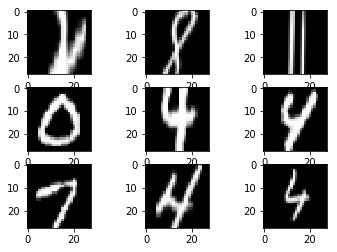

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [4]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data

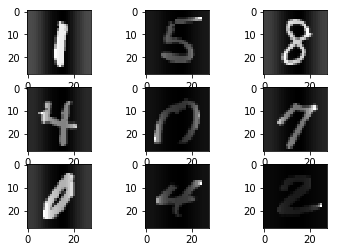

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [1]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1123 15:44:20.948731 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1123 15:44:20.977765 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 15:44:20.980509 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1123 15:44:21.026597 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1123 15:44:21.393069 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 50s 2ms/step - loss: 0.4537 - acc: 0.7643 - val_loss: 0.2935 - val_acc: 0.8740
Epoch 2/2
25000/25000 [==============================] - 45s 2ms/step - loss: 0.1694 - acc: 0.9363 - val_loss: 0.3202 - val_acc: 0.8690
ACC: 86.90%


In [4]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [6]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation= 'relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))






/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
K.tensorflow_backend.set_image_dim_ordering('th')

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr = lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32, verbose=2)
scores = model.compile(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))




W1124 14:26:26.680258 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 32, 32..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  del sys.path[0]
W1124 14:26:26.786724 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1124 14:26:26.816965 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

W1124 14:26:27.741358 140735902135168 deprecation.py:323] From /Users/syem/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25


In [1]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))




/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1124 15:08:48.764744 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1124 15:08:48.908205 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1124 15:08:48.953741 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1124 15:08:49.061454 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1124 15:08:49.465267 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 55s 2ms/step - loss: 0.4841 - acc: 0.7281 - val_loss: 0.3077 - val_acc: 0.8673
Epoch 2/2
25000/25000 [==============================] - 47s 2ms/step - loss: 0.1792 - acc: 0.9340 - val_loss: 0.3132 - val_acc: 0.8689
ACC: 86.89%


In [3]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [4]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [5]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=5000)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 68s 3ms/step - loss: 0.4542 - acc: 0.7646 - val_loss: 0.2922 - val_acc: 0.8756
Epoch 2/2
25000/25000 [==============================] - 61s 2ms/step - loss: 0.1614 - acc: 0.9405 - val_loss: 0.3238 - val_acc: 0.8699
ACC: 86.99%


In [7]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print("ACC: %.2f%%" % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 98s 4ms/step - loss: 0.4290 - acc: 0.7795 - val_loss: 0.2689 - val_acc: 0.8874
Epoch 2/2
25000/25000 [==============================] - 75s 3ms/step - loss: 0.2046 - acc: 0.9206 - val_loss: 0.2674 - val_acc: 0.8886
ACC: 88.86%


In [1]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Using TensorFlow backend.


/Users/syem/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


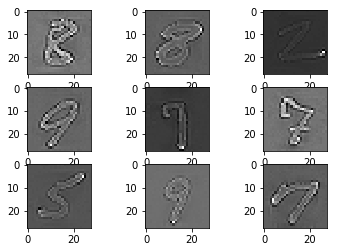

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break



In [5]:
# ZCA # ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

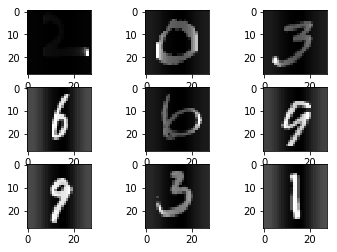

In [6]:
(X_train, y_train),(X_test,  y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap = pyplot.get_cmap('gray'))
    pyplot.show()
    break


In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [3]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words =top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen= max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length =  max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W1126 15:54:32.841130 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1126 15:54:32.888452 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1126 15:54:32.891919 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1126 15:54:32.945120 140735902135

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W1126 15:54:33.263033 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 44s 2ms/step - loss: 0.4565 - acc: 0.7577 - val_loss: 0.2947 - val_acc: 0.8747
Epoch 2/2
25000/25000 [==============================] - 42s 2ms/step - loss: 0.1696 - acc: 0.9379 - val_loss: 0.3130 - val_acc: 0.8729
ACC: 87.29%


In [4]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [7]:
top_words = 5000
(X_train, y_train),(X_test, y_test)= imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
scores=model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.
W1126 16:07:42.158643 140735902135168 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [8]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 68s 3ms/step - loss: 0.4633 - acc: 0.7578 - val_loss: 0.2895 - val_acc: 0.8775
Epoch 2/2
25000/25000 [==============================] - 50s 2ms/step - loss: 0.1783 - acc: 0.9338 - val_loss: 0.3082 - val_acc: 0.8747
ACC: 87.47%


In [11]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [14]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words= top_words)
max_words = 5000
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if __name__ == '__main__':


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 5000, 32)          160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5000, 32)          3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               20000250  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 20,163,605
Trainable params: 20,163,605
Non-trainable params: 0
__________________________________________

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 679s 27ms/step - loss: 0.4411 - acc: 0.7749 - val_loss: 0.2727 - val_acc: 0.8857
Epoch 2/2
25000/25000 [==============================] - 759s 30ms/step - loss: 0.2107 - acc: 0.9183 - val_loss: 0.2691 - val_acc: 0.8879


In [1]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train,y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
W0114 20:03:45.320280 140735616803712 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0114 20:03:45.504916 140735616803712 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0114 20:03:45.546077 140735616803712 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0114 20:03:45.650971 140735616803

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


W0114 20:03:46.176717 140735616803712 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 100s 4ms/step - loss: 0.4427 - acc: 0.7736 - val_loss: 0.3028 - val_acc: 0.8701
Epoch 2/2
25000/25000 [==============================] - 54s 2ms/step - loss: 0.1583 - acc: 0.9421 - val_loss: 0.3368 - val_acc: 0.8666
ACC: 86.66%


In [3]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence




In [6]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores  = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: .2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  if __name__ == '__main__':
W0114 20:14:21.171635 140735616803712 deprecation_wrapper.py:119] From /Users/syem/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [7]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [8]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 58s 2ms/step - loss: 0.4643 - acc: 0.7533 - val_loss: 0.3262 - val_acc: 0.8597
Epoch 2/2
25000/25000 [==============================] - 56s 2ms/step - loss: 0.1696 - acc: 0.9365 - val_loss: 0.3190 - val_acc: 0.8715
ACC: 87.15%


In [9]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size=128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: .2f%%' % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  import sys
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [11]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [14]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose= 0)
print('ACC: %.2f%%' % (scores[1]*100))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 63s 3ms/step - loss: 0.4718 - acc: 0.7479 - val_loss: 0.3019 - val_acc: 0.8720
Epoch 2/2
25000/25000 [==============================] - 51s 2ms/step - loss: 0.1753 - acc: 0.9344 - val_loss: 0.3151 - val_acc: 0.8717
ACC: 87.17%


In [15]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [16]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  if __name__ == '__main__':
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  # Remove the CWD from sys.path while we load stuff.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 119s 5ms/step - loss: 0.4920 - acc: 0.7293 - val_loss: 0.2814 - val_acc: 0.8830
Epoch 2/2
25000/25000 [==============================] - 90s 4ms/step - loss: 0.2279 - acc: 0.9117 - val_loss: 0.2808 - val_acc: 0.8835
ACC: 88.35%


In [17]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [20]:
top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optiizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))

TypeError: compile() missing 1 required positional argument: 'optimizer'

In [21]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
___________________________________________

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 98s 4ms/step - loss: 0.4451 - acc: 0.7597 - val_loss: 0.2744 - val_acc: 0.8852
Epoch 2/2
25000/25000 [==============================] - 68s 3ms/step - loss: 0.2153 - acc: 0.9158 - val_loss: 0.2851 - val_acc: 0.8827
ACC: 88.27%


In [23]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%% ' % (scores[1]*100))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
flatten_9 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 62s 2ms/step - loss: 0.4643 - acc: 0.7547 - val_loss: 0.2968 - val_acc: 0.8731
Epoch 2/2
25000/25000 [==============================] - 52s 2ms/step - loss: 0.1726 - acc: 0.9357 - val_loss: 0.3078 - val_acc: 0.8746
ACC: 87.46% 


In [25]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence




top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model  = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu' ))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=0  )
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))
                    

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 88.53%


In [26]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))




/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 67s 3ms/step - loss: 0.4998 - acc: 0.7132 - val_loss: 0.3121 - val_acc: 0.8659
Epoch 2/2
25000/25000 [==============================] - 59s 2ms/step - loss: 0.1842 - acc: 0.9309 - val_loss: 0.3282 - val_acc: 0.8706
ACC: 87.06%


In [27]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length= max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 88.76%


In [29]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose=1)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))



/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 62s 2ms/step - loss: 0.4806 - acc: 0.7408 - val_loss: 0.2966 - val_acc: 0.8738
Epoch 2/2
25000/25000 [==============================] - 51s 2ms/step - loss: 0.1769 - acc: 0.9332 - val_loss: 0.3185 - val_acc: 0.8688
ACC: 86.88%


In [30]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 87.05%


In [31]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence



top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 0)
print('ACC : %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC : 87.05%


In [32]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words ))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))


/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 87.05%


In [33]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size =128, verbose=0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC


In [38]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))          
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch = 2, batch_size = 128, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: ' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 


In [40]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen= max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, nb_epoch = 2, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 87.34%


In [42]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, nb_epoch = 2, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))

/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 88.02%


In [43]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence



top_words = 5000
(X_train, y_train),(X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, nb_epoch = 2, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)
print('ACC: %.2f%%' % (scores[1]*100))








/Users/syem/anaconda3/lib/python3.7/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/Users/syem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ACC: 87.35%


In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words = top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Convolution1D(nb_filter = 32, filter_length = 3, border_mode = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_length = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 128, nb_epoch = 2, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('ACC: %.2f%%' % (scores[1]*100))